In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
store_df = pd.read_csv('ts_superstore.csv')

In [22]:
store_df.head()

,Unnamed: 0,item,sale_amount,sale_id,store,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode
sale_date,,,,,,,,,,,,,,,,
2013-01-01,0,1,13.0,1,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
2013-01-02,1,1,11.0,2,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
2013-01-03,2,1,14.0,3,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
2013-01-04,3,1,13.0,4,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
2013-01-05,4,1,10.0,5,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253


<AxesSubplot:>

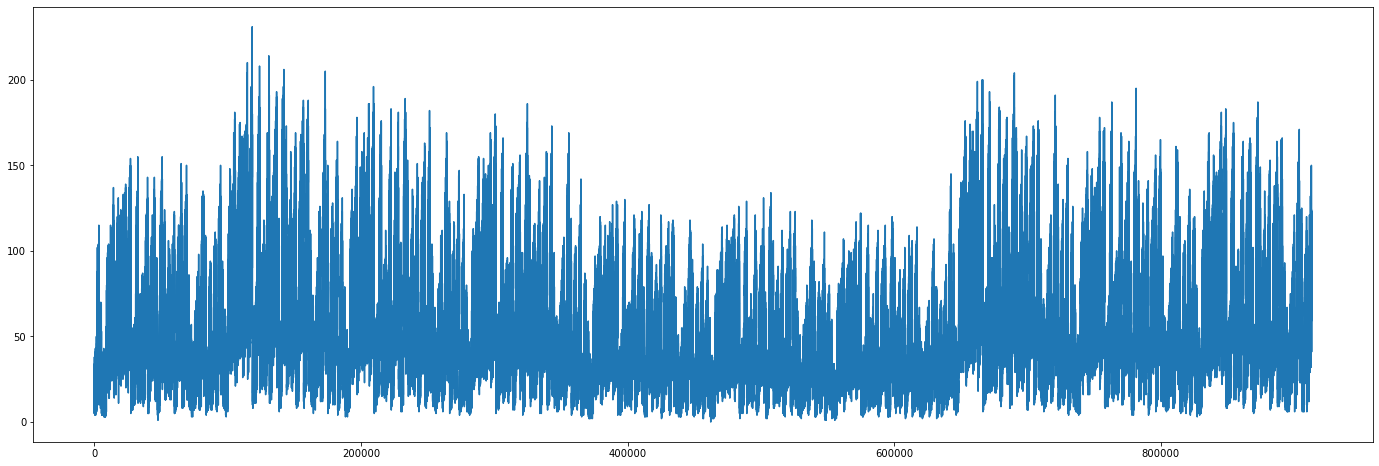

In [7]:
plt.figure(figsize=(24, 8)) 
store_df.sale_amount.plot()

<AxesSubplot:>

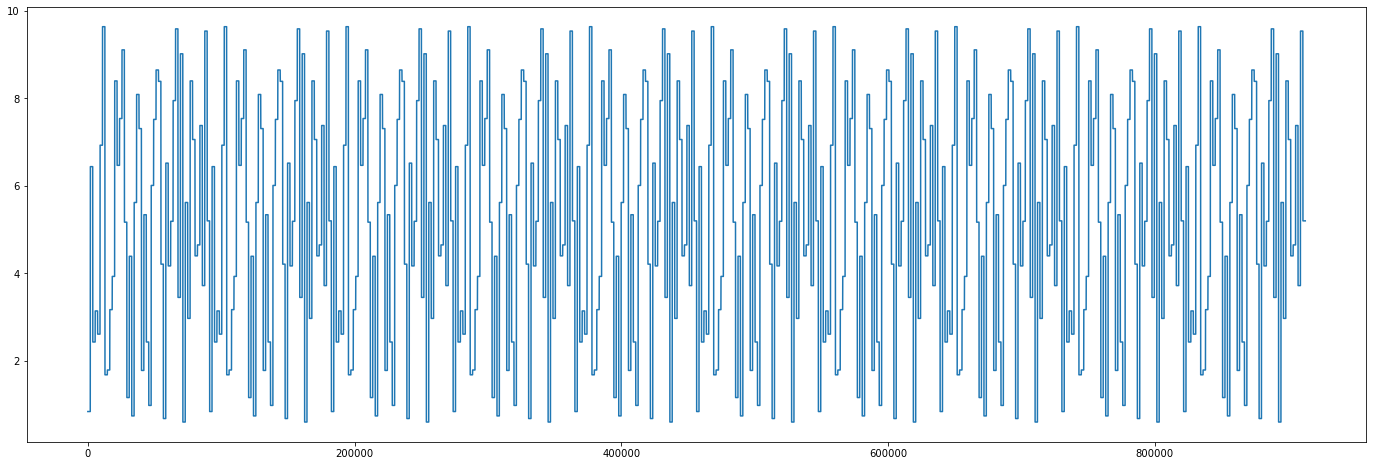

In [8]:
plt.figure(figsize=(24, 8))
store_df.item_price.plot()  

In [14]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     913000 non-null  int64  
 1   item           913000 non-null  int64  
 2   sale_amount    913000 non-null  float64
 3   sale_date      913000 non-null  object 
 4   sale_id        913000 non-null  int64  
 5   store          913000 non-null  int64  
 6   item_brand     913000 non-null  object 
 7   item_id        913000 non-null  int64  
 8   item_name      913000 non-null  object 
 9   item_price     913000 non-null  float64
 10  item_upc12     913000 non-null  int64  
 11  item_upc14     913000 non-null  int64  
 12  store_address  913000 non-null  object 
 13  store_city     913000 non-null  object 
 14  store_id       913000 non-null  int64  
 15  store_state    913000 non-null  object 
 16  store_zipcode  913000 non-null  int64  
dtypes: float64(2), int64(9), obje

In [18]:
#finds and replaces bad hour time stamps
store_df.sale_date = store_df.sale_date.str.replace(' 00:00:00 GMT', '')

In [19]:
store_df.sale_date

0         Tue, 01 Jan 2013
1         Wed, 02 Jan 2013
2         Thu, 03 Jan 2013
3         Fri, 04 Jan 2013
4         Sat, 05 Jan 2013
                ...       
912995    Wed, 27 Dec 2017
912996    Thu, 28 Dec 2017
912997    Fri, 29 Dec 2017
912998    Sat, 30 Dec 2017
912999    Sun, 31 Dec 2017
Name: sale_date, Length: 913000, dtype: object

In [20]:
#converts sale_date to datetime
store_df.sale_date = pd.to_datetime(store_df.sale_date, format='%a, %d %b %Y')

In [21]:
store_df=store_df.set_index('sale_date')

In [23]:
store_df['dayofweek'] = store_df.index.dayofweek

In [24]:
store_df['month'] = store_df.index.month

In [27]:
store_df.head()

,Unnamed: 0,item,sale_amount,sale_id,store,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode,dayofweek,month,sales_total
sale_date,,,,,,,,,,,,,,,,,,,
2013-01-01,0,1,13.0,1,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,1,1,10.92
2013-01-02,1,1,11.0,2,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,2,1,9.24
2013-01-03,2,1,14.0,3,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,3,1,11.76
2013-01-04,3,1,13.0,4,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,4,1,10.92
2013-01-05,4,1,10.0,5,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,5,1,8.40


In [26]:
store_df["sales_total"] = store_df.sale_amount * store_df.item_price

In [28]:
germany = pd.read_csv("https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv")

In [48]:
germany.head()

,consumption,wind,solar,wind_solar,month,year
Date,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,January,2006
2006-01-02,1380.521,0.0,0.0,0.0,January,2006
2006-01-03,1442.533,0.0,0.0,0.0,January,2006
2006-01-04,1457.217,0.0,0.0,0.0,January,2006
2006-01-05,1477.131,0.0,0.0,0.0,January,2006


In [35]:
germany.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2006-01-01 to 2017-12-31
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Consumption  4383 non-null   float64
 1   Wind         2920 non-null   float64
 2   Solar        2188 non-null   float64
 3   Wind+Solar   2187 non-null   float64
dtypes: float64(4)
memory usage: 171.2 KB


In [31]:
germany.Date = pd.to_datetime(germany.Date)

In [34]:
germany=germany.set_index('Date')


In [36]:
#change column names to lowercase
germany.columns = [col.lower() for col in germany]

In [38]:
#change column names to snake case
germany.columns = [col.replace('+', '_') for col in germany]


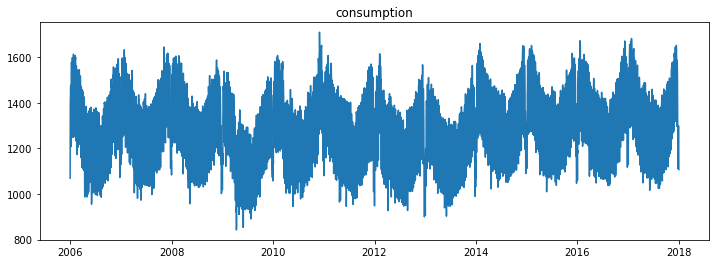

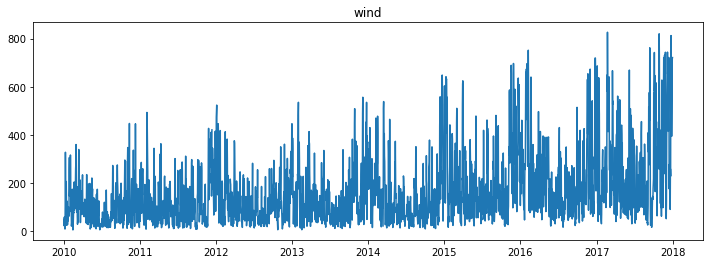

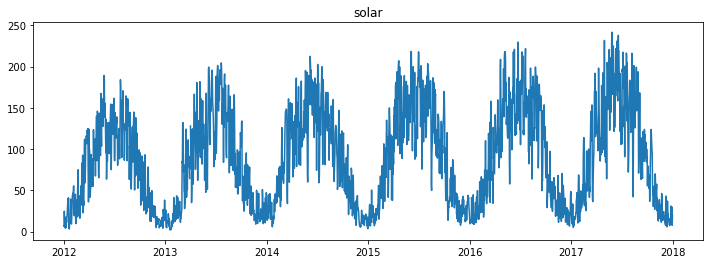

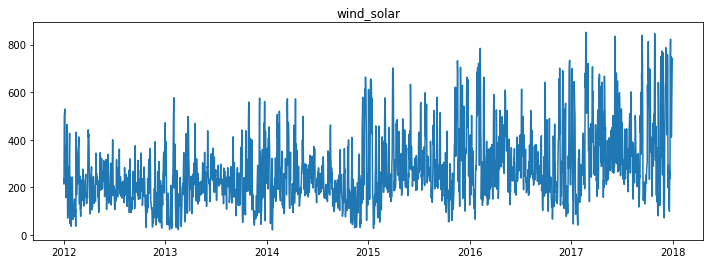

In [42]:
#plot each column
for col in germany.columns:
    plt.figure(figsize=(12, 4))
    plt.plot(germany[col])
    plt.title(col)
    plt.show()


In [45]:
#creates a column for each time unit from the index
germany["month"] = germany.index.month_name()
germany["year"] = germany.index.year

In [47]:
#replace all NaNs with 0
germany = germany.fillna(0)

In [49]:
#difference between days plus one
germany.index.max() - germany.index.min()  + pd.Timedelta('1d')

Timedelta('4383 days 00:00:00')

In [51]:
#see how many unique days we actually have
germany.index.nunique()

4383